In [11]:
from tensorflow.keras.applications import *
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import os
import shutil
import pandas as pd
from sklearn import model_selection
from tqdm import tqdm
from tensorflow.keras import optimizers
import tensorflow as tf

In [24]:
conv_base = EfficientNetB4(weights = None, include_top = False, input_shape = (350,231,3))

In [25]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalMaxPooling2D())
#avoid overfitting
model.add(layers.Dropout(rate=0.5))
# Set NUMBER_OF_CLASSES to the number of your final predictions.
model.add(layers.Dense(2, activation="softmax", name="fc_out"))
conv_base.trainable = False

In [32]:
train_loc = './COVIDwavSplitTrimmedMFCC/train/'
test_loc = './COVIDwavSplitTrimmedMFCC/val/'
trdata = ImageDataGenerator(rescale=1.0 / 255)
train_data = trdata.flow_from_directory(directory=train_loc, target_size=(350,231),
    class_mode="categorical")
tsdata = ImageDataGenerator(rescale=1.0 / 255)
test_data = tsdata.flow_from_directory(directory=test_loc, target_size=(350,231),
    class_mode="categorical")
model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=["acc"],
)

Found 4392 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.


In [33]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("efficientnet-covid.h5", monitor='val_acc', verbose=1, 
                             save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

In [34]:
hist = model.fit(
    train_data,
    steps_per_epoch=train_data.samples//train_data.batch_size,
    epochs=100,
    validation_data=test_data,
    validation_steps=test_data.samples//test_data.batch_size,
    callbacks=[checkpoint,early]
)

Epoch 1/100
137/137 [==============================] - ETA: 0s - loss: 0.6931 - acc: 0.5101
Epoch 00001: val_acc improved from -inf to 0.51172, saving model to efficientnet-covid.h5
137/137 [==============================] - 33s 240ms/step - loss: 0.6931 - acc: 0.5101 - val_loss: 0.6931 - val_acc: 0.5117
Epoch 2/100
137/137 [==============================] - ETA: 0s - loss: 0.6931 - acc: 0.5122
Epoch 00002: val_acc did not improve from 0.51172
137/137 [==============================] - 30s 219ms/step - loss: 0.6931 - acc: 0.5122 - val_loss: 0.6931 - val_acc: 0.5107
Epoch 3/100
137/137 [==============================] - ETA: 0s - loss: 0.6931 - acc: 0.5092
Epoch 00003: val_acc did not improve from 0.51172
137/137 [==============================] - 30s 220ms/step - loss: 0.6931 - acc: 0.5092 - val_loss: 0.6931 - val_acc: 0.5098
Epoch 4/100
137/137 [==============================] - ETA: 0s - loss: 0.6931 - acc: 0.5101
Epoch 00004: val_acc did not improve from 0.51172
137/137 [===========

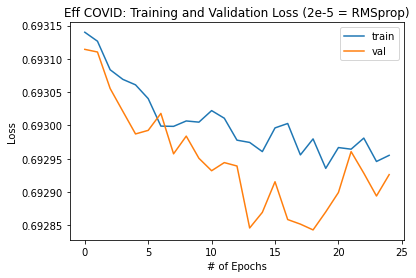

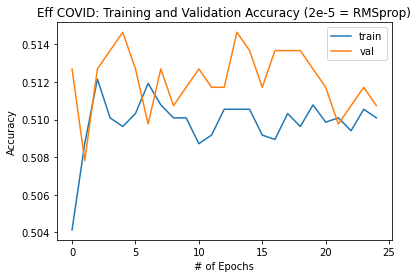

In [16]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.title('Eff COVID: Training and Validation Loss (2e-5 = RMSprop)')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.legend();
plt.savefig('covidEfflossB4.png')
plt.show()


plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='val')
plt.title('Eff COVID: Training and Validation Accuracy (2e-5 = RMSprop)')
plt.xlabel('# of Epochs')
plt.ylabel('Accuracy')
plt.legend();
plt.savefig('covidEffaccuracyB4.png')
plt.show()

In [17]:
y_pred = model.predict(test_data)

In [18]:
import numpy as np
Y_pred = np.argmax(y_pred, axis = 1)

In [ ]:
# Import the modules from `sklearn.metrics` 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay# Confusion matrix
cm = confusion_matrix(test_data.classes,Y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = test_data.class_indices.keys())
disp.plot()
#precision_score(test_data.classes, y_pred) 

#recall_score(test_data.classes, y_pred) 

#f1_score(test_data.classes,y_pred) 